In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dimred_utils

Tomamos 40 componentes y nos queda un 90.23 % de la varianza total


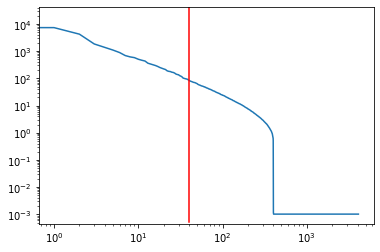

In [6]:
dimred_utils.oliv_autoval_analisis(n_comp = 40)

Extracting the top 40 PCA using randomized SVD...
Error cuadrático medio en reconstrucción:  0.002879782
done in 0.707s


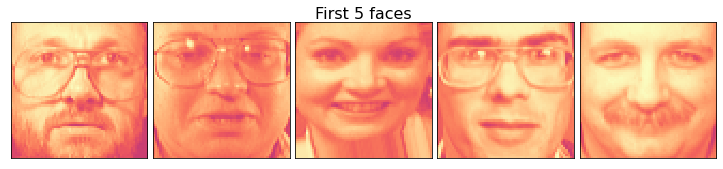

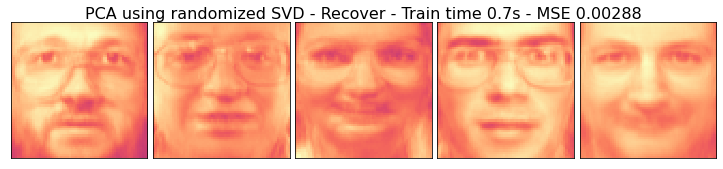

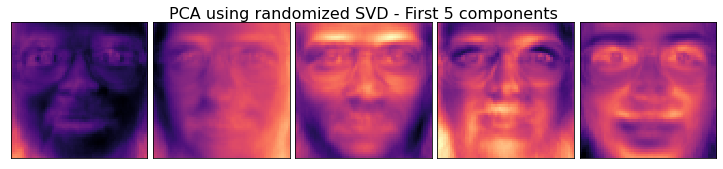

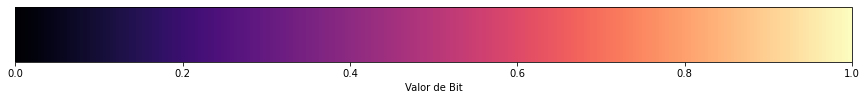




Extracting the top 40 Non-negative components - NMF...
Error cuadrático medio en reconstrucción:  0.003319014
done in 7.696s


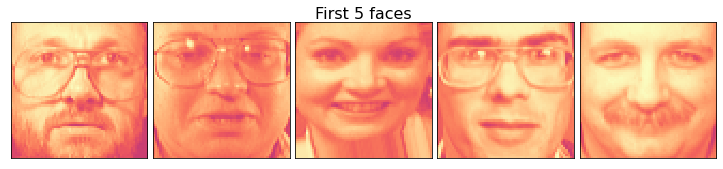

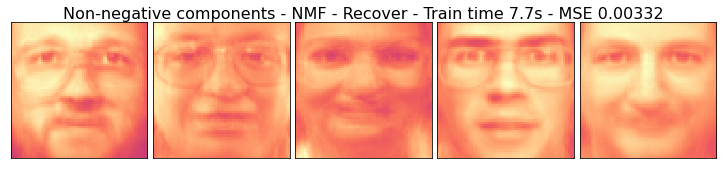

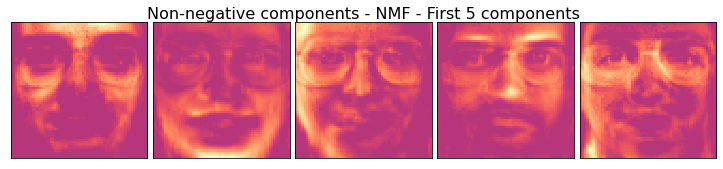

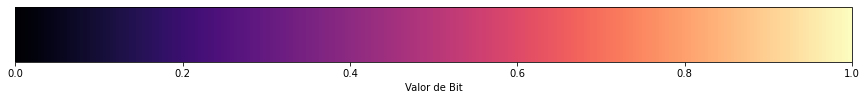




Extracting the top 40 Independent components - FastICA...
Error cuadrático medio en reconstrucción:  0.0028769476193677237
done in 4.620s


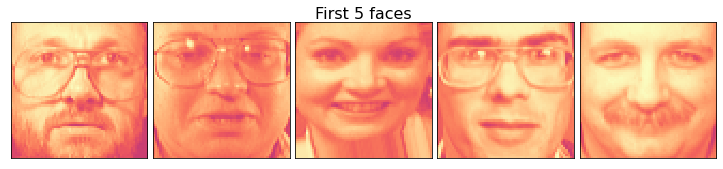

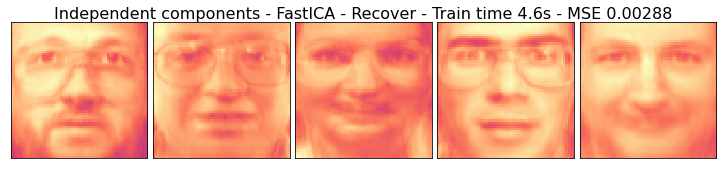

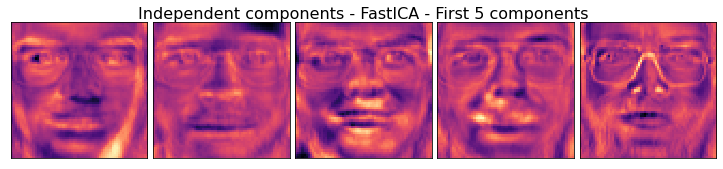

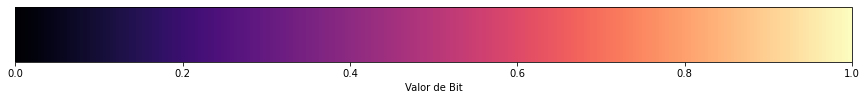

In [61]:
dimred_utils.oliv_pretest(n_comp = 40)

Error cuadrático medio de arquitectura lineal:  0.0029465676445215383
Error cuadrático medio de arquitectura multicapa:  0.00208886996824039


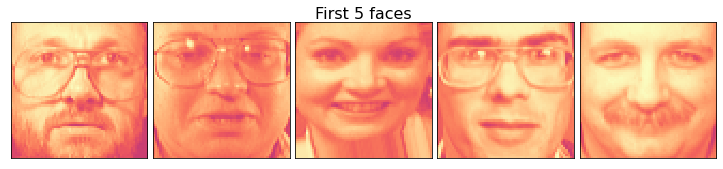

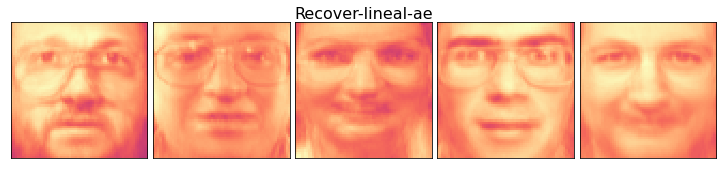

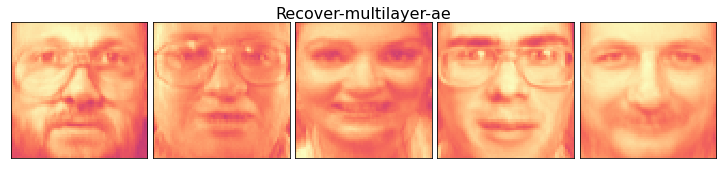

In [59]:
dimred_utils.oliv_aetest(n_comp = 40)

In [21]:
%%html
<style>
.output_wrapper, .output {
       height:auto !important;
       max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
       box-shadow:none !important;
       webkit-box-shadow:none !important;
}
</style>